In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")
from imblearn.over_sampling import RandomOverSampler
sns.set(style='whitegrid')

In [2]:
train  = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/MachineLearning/master/dataset/Health%20Insurance%20Cross%20Sell%20Prediction%20%F0%9F%8F%A0%20%F0%9F%8F%A5/train.csv")
test = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/MachineLearning/master/dataset/Health%20Insurance%20Cross%20Sell%20Prediction%20%F0%9F%8F%A0%20%F0%9F%8F%A5/test.csv")

In [3]:
train.head(2)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0


In [4]:
test.head(2)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111


In [5]:
print("Shape of train dataset ",train.shape )
print("Shape of test dataset ",test.shape )

Shape of train dataset  (381109, 12)
Shape of test dataset  (127037, 11)


In [6]:
train.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [7]:
train.isnull().values.any()

False

In [8]:
train = train.dropna(how='any',axis=0)

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 37.8+ MB


In [10]:
data= pd.concat([train,test],axis=0,sort=False)
data.nunique()

id                      508146
Gender                       2
Age                         66
Driving_License              2
Region_Code                 53
Previously_Insured           2
Vehicle_Age                  3
Vehicle_Damage               2
Annual_Premium           52062
Policy_Sales_Channel       157
Vintage                    290
Response                     2
dtype: int64

In [11]:
numeric_data = train.select_dtypes(include = np.number)
numeric_col = numeric_data.columns
numeric_data.head(1)

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,44,1,28.0,0,40454.0,26.0,217,1


In [12]:
categorical_data = train.select_dtypes(exclude= np.number)
categorical_col = categorical_data.columns
categorical_data.head(1)

,Gender,Vehicle_Age,Vehicle_Damage
0,Male,> 2 Years,Yes


In [13]:
a = train['Response'].value_counts()/len(train)*100
b = train['Gender'].value_counts()
c = train['Vehicle_Age'].value_counts()
d = train['Vehicle_Damage'].value_counts()

print(a)
print('\n')
print(b)
print('\n')
print(c)
print('\n')
print(d)

0    87.743664
1    12.256336
Name: Response, dtype: float64


Male      206089
Female    175020
Name: Gender, dtype: int64


1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: Vehicle_Age, dtype: int64


Yes    192413
No     188696
Name: Vehicle_Damage, dtype: int64


In [14]:
def outliers(df, variable, distance):
     IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
     lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
     upper_boundary = df[variable].quantile(0.75) + (IQR * distance) 
        
     return upper_boundary, lower_boundary
    
upper_limit, lower_limit = outliers(train, 'Annual_Premium', 1.5)
upper_limit, lower_limit  

(61892.5, 1912.5)

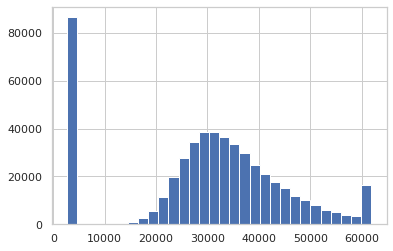

In [15]:
data['Annual_Premium']= np.where(data['Annual_Premium'] > upper_limit, upper_limit, 
                                 np.where(data['Annual_Premium'] < lower_limit, lower_limit, data['Annual_Premium']))
plt.hist(data['Annual_Premium'],bins=30);

In [16]:
train.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [17]:
numerical_columns = ['Age', 'Region_Code', 'Annual_Premium', 'Vintage']
categorical_columns =['Gender', 'Driving_License', 'Previously_Insured','Vehicle_Age', 'Vehicle_Damage', 'Policy_Sales_Channel', 'Response' ] 

In [18]:
train[numerical_columns].describe()

,Age,Region_Code,Annual_Premium,Vintage
count,381109.000000,381109.000000,381109.000000,381109.000000
mean,38.822584,26.388807,30564.389581,154.347397
std,15.511611,13.229888,17213.155057,83.671304
min,20.000000,0.000000,2630.000000,10.000000
25%,25.000000,15.000000,24405.000000,82.000000
50%,36.000000,28.000000,31669.000000,154.000000
75%,49.000000,35.000000,39400.000000,227.000000
max,85.000000,52.000000,540165.000000,299.000000


In [19]:
col = train.columns.tolist()
col.remove('id')
train[col].describe(percentiles = [.25,.50,.75,.95,.99])

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
95%,69.000000,1.000000,47.000000,1.000000,55176.000000,160.000000,285.000000,1.000000
99%,77.000000,1.000000,50.000000,1.000000,72963.000000,160.000000,297.000000,1.000000
max,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


<AxesSubplot:title={'center':'pie chart of percentage of target class'}, ylabel='Response'>

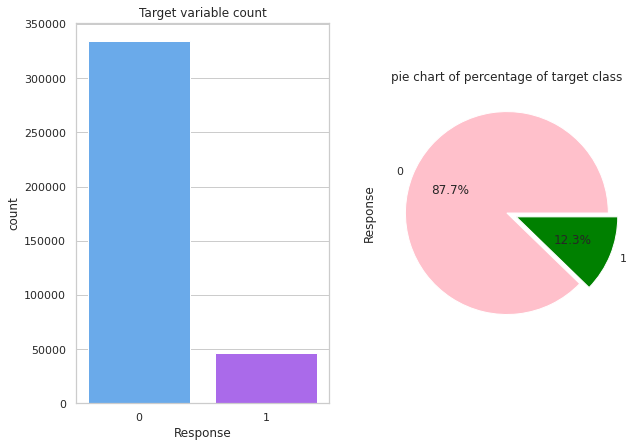

In [20]:
plt.subplot(1,2,1)
sns.countplot(train['Response'],palette = 'cool')
plt.title("Target variable count")



plt.subplot(1,2,2)
count = train['Response'].value_counts()
count.plot.pie(    autopct = '%1.1f%%',   colors=['pink', 'green'], figsize= (10,7), explode= [0,0.1], title = "pie chart of percentage of target class")

In [21]:
print( "Percentage of target class\n")
print(train['Response'].value_counts()/len(train)*100)

Percentage of target class

0    87.743664
1    12.256336
Name: Response, dtype: float64


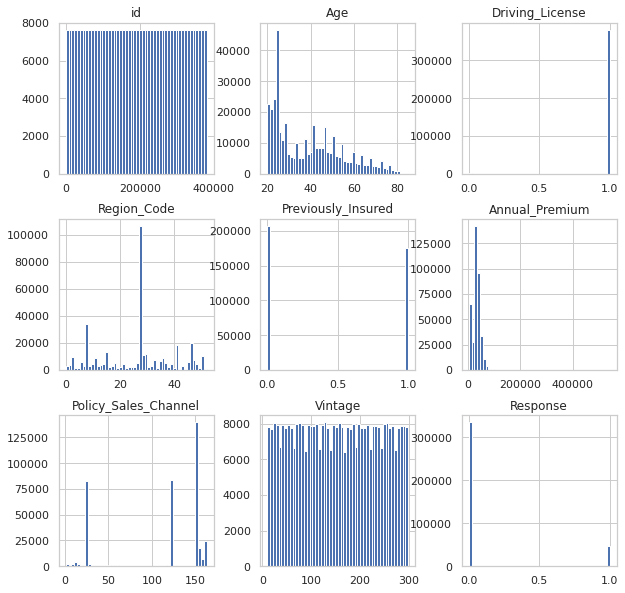

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
train.hist(bins= 50, figsize= (10,10))
plt.show()

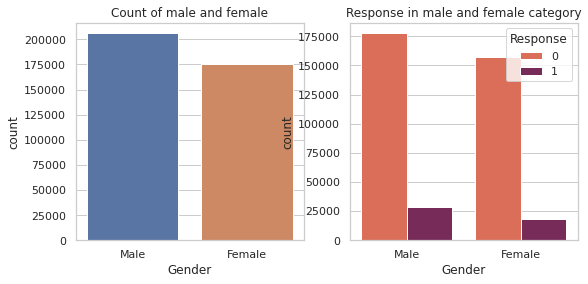

In [23]:
plt.figure(figsize= (9,4))
plt.subplot(1,2,1)
sns.countplot(train['Gender'])
plt.title("Count of male and female")



plt.subplot(1,2,2)
sns.countplot(train['Gender'], hue= train['Response'], palette= "rocket_r")
plt.title("Response in male and female category")
plt.show()

In [24]:
train['Gender'].value_counts()

Male      206089
Female    175020
Name: Gender, dtype: int64

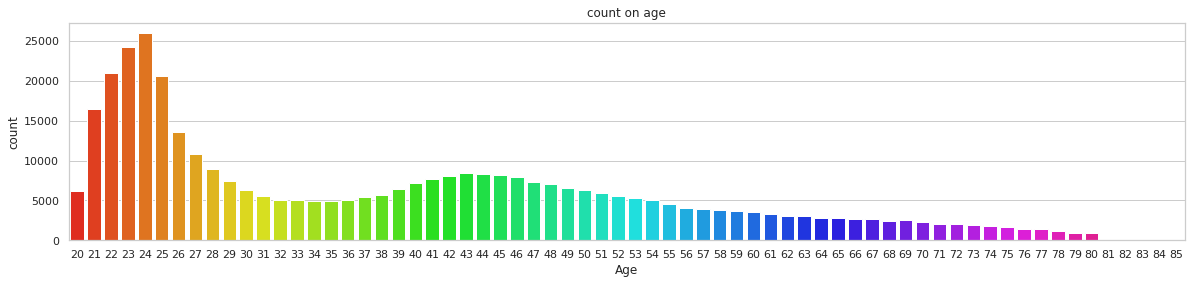

In [25]:
plt.figure(figsize=(20,4))
sns.countplot(train['Age'], palette= 'hsv')
plt.title("count on age")
plt.show()

<AxesSubplot:xlabel='Age'>

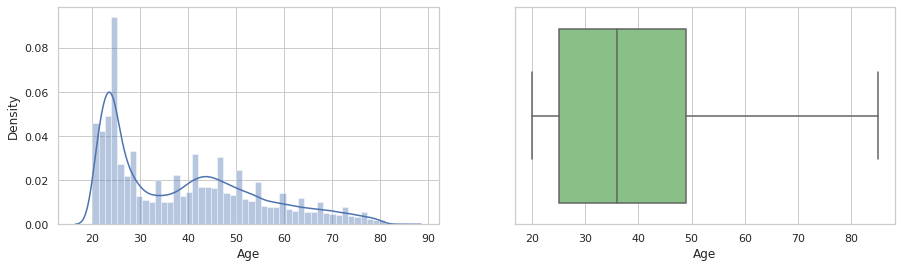

In [26]:
plt.figure(figsize= (15,4))
plt.subplot(1,2,1)
sns.distplot(train['Age'])


plt.subplot(1,2,2)
sns.boxplot(train['Age'], palette= 'Accent')

Percentage of  Driving_License feature
 
1    99.786938
0     0.213062
Name: Driving_License, dtype: float64


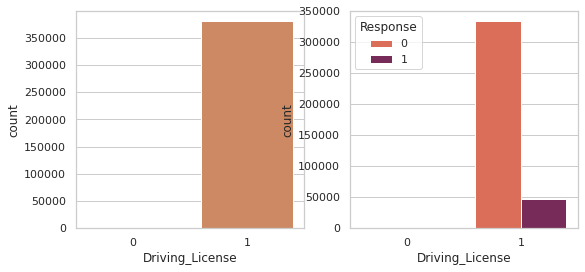

In [27]:
plt.figure(figsize= (9,4))
plt.subplot(1,2,1)
sns.countplot(train['Driving_License'])


plt.subplot(1,2,2)
sns.countplot(train['Driving_License'], hue= train['Response'], data= train, palette= "rocket_r")

print("Percentage of  Driving_License feature\n ")
print(train['Driving_License'].value_counts()/len(train)*100)

<AxesSubplot:xlabel='Region_Code'>

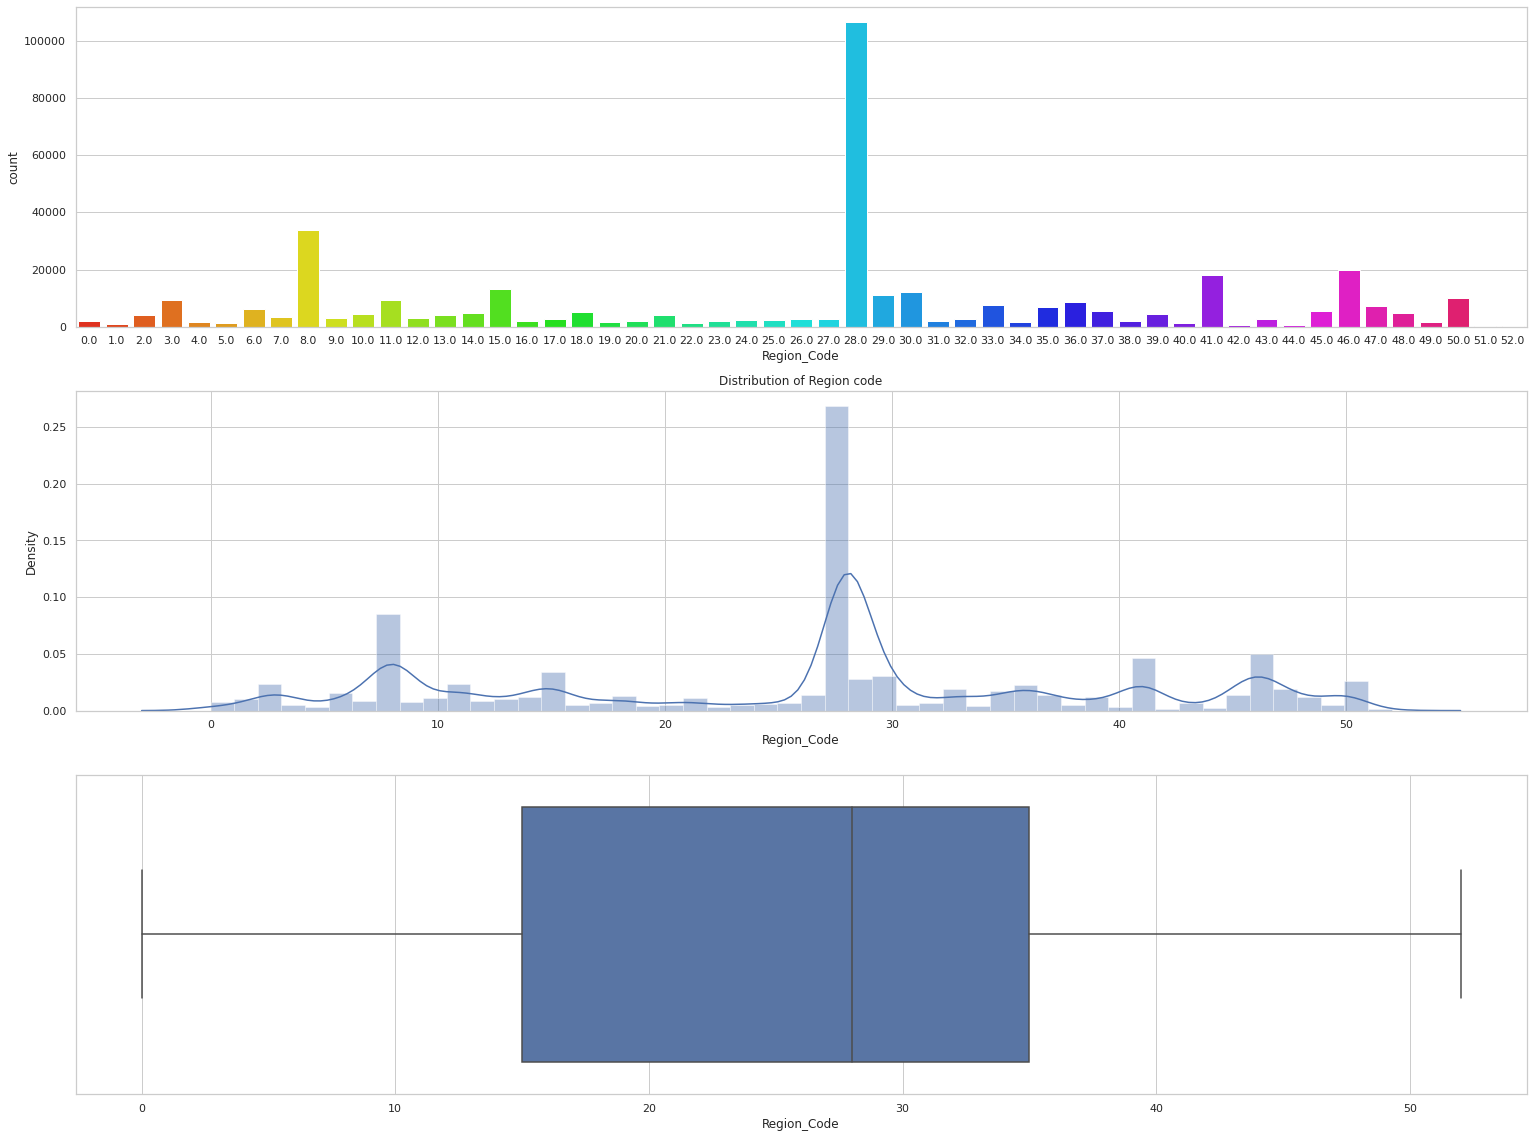

In [28]:
plt.figure(figsize=(26,20))
plt.subplot(3,1,1)
sns.countplot(train["Region_Code"], data= train, palette= 'hsv')


plt.subplot(3,1,2)
sns.distplot(train['Region_Code'])
plt.title('Distribution of Region code')


plt.subplot(3,1,3)
sns.boxplot(train['Region_Code'])

Percentage of Previously_Insured feature 
0    54.178988
1    45.821012
Name: Previously_Insured, dtype: float64


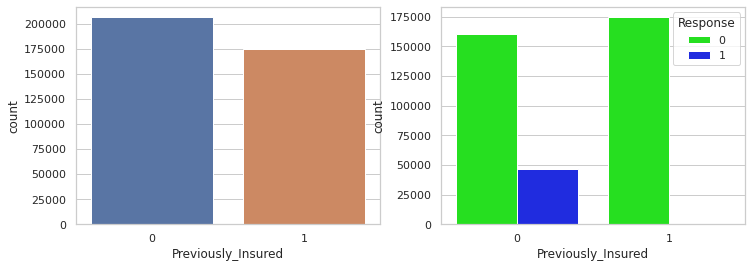

In [29]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.countplot(train['Previously_Insured'])

plt.subplot(1,2,2)
sns.countplot(train['Previously_Insured'], hue=train['Response'], palette= 'hsv' )

print("Percentage of Previously_Insured feature ")
print(train['Previously_Insured'].value_counts()/len(train)*100)

<AxesSubplot:xlabel='Vehicle_Age', ylabel='count'>

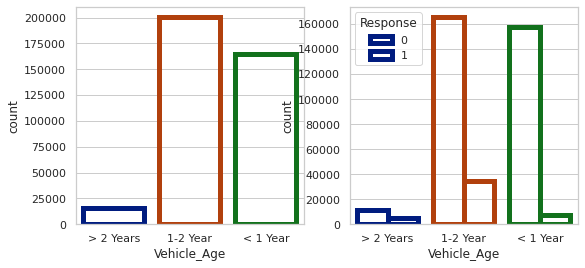

In [30]:
plt.figure(figsize =(9,4))
plt.subplot(1,2,1)
ax = sns.countplot(train['Vehicle_Age'], data=train,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 7))

plt.subplot(1,2,2)
sns.countplot(train['Vehicle_Age'], hue=train['Response'], facecolor=(0, 0, 0, 0),
                   linewidth=5, edgecolor=sns.color_palette("dark", 7))

<AxesSubplot:ylabel='Vehicle_Age'>

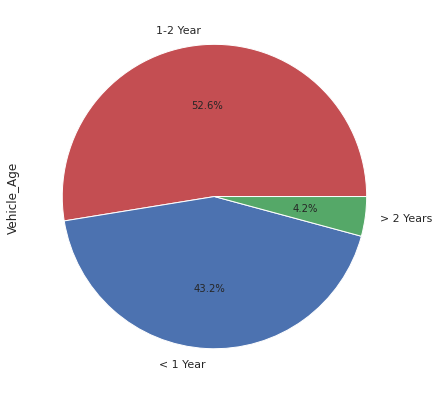

In [31]:
plt.figure(figsize=(7,7))
train['Vehicle_Age'].value_counts().plot.pie(autopct='%1.1f%%', colors = ['r', 'b', 'g'])

<AxesSubplot:xlabel='Vehicle_Damage', ylabel='count'>

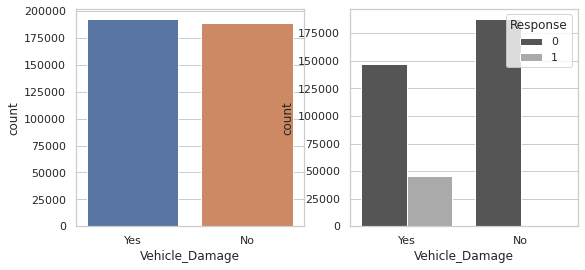

In [32]:
plt.figure(figsize= (9,4))
plt.subplot(1,2,1)
sns.countplot(train['Vehicle_Damage'])


plt.subplot(1,2,2)
sns.countplot(train['Vehicle_Damage'], hue= train['Response'], palette ='binary_r')

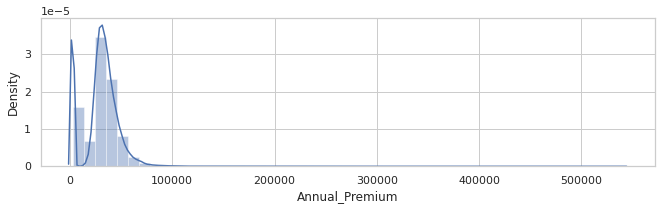

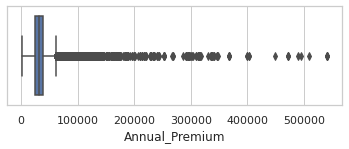

In [33]:
plt.figure(figsize =(11,6))
plt.subplot (2,1,1)
sns.distplot(train['Annual_Premium'])
plt.show()

plt.subplot(2,1,2)
sns.boxplot(train['Annual_Premium'])
plt.show()

<AxesSubplot:title={'center':'Correlation plot'}>

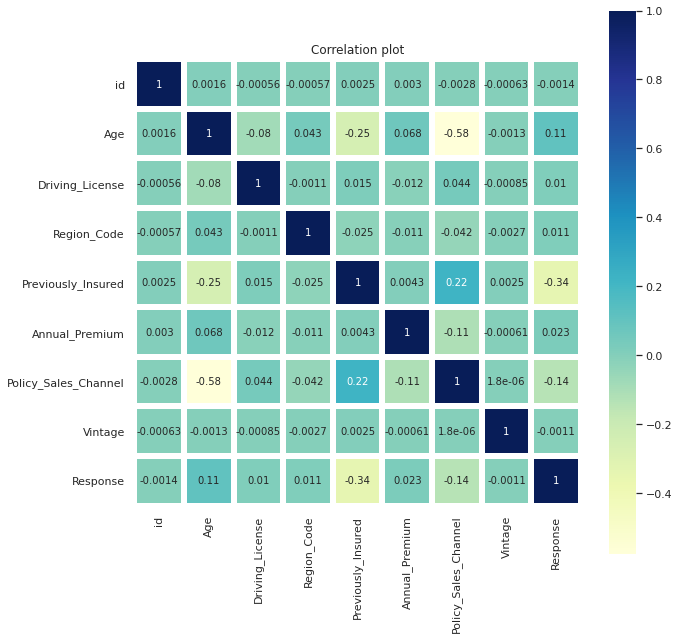

In [34]:
plt.figure(figsize=(10,10))
plt.title("Correlation plot")
sns.heatmap(train.corr(),linewidths=5, annot=True, square=True,annot_kws={'size': 10},cmap='YlGnBu')

In [35]:
train.head(5)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


<AxesSubplot:xlabel='Age', ylabel='Annual_Premium'>

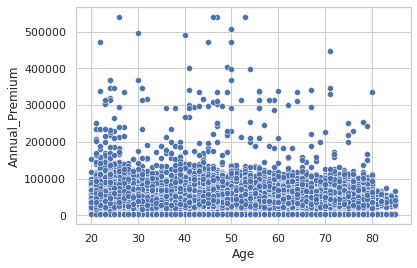

In [36]:
sns.scatterplot(x= train['Age'], y= train['Annual_Premium'])

In [37]:
df =train.groupby(['Gender'])['Driving_License'].count().to_frame().reset_index()
df

,Gender,Driving_License
0,Female,175020
1,Male,206089


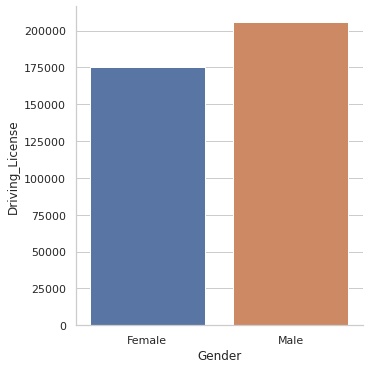

In [38]:
sns.catplot(x='Gender', y='Driving_License', data=df, kind='bar')

<AxesSubplot:xlabel='Vintage', ylabel='Density'>

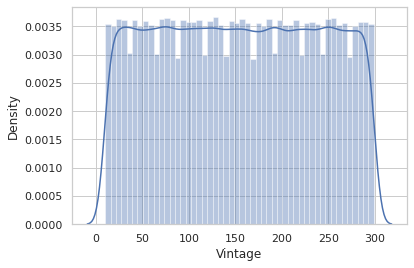

In [39]:
sns.distplot(train.Vintage)

In [40]:
train.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [41]:
train.head(5)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [42]:
train.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [43]:
train['Gender'] = train['Gender'].map( {'Female': 0, 'Male': 1} ).astype(int)
train=pd.get_dummies(train,drop_first=True)
train.head(5)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes
0,1,1,44,1,28.0,0,40454.0,26.0,217,1,0,1,1
1,2,1,76,1,3.0,0,33536.0,26.0,183,0,0,0,0
2,3,1,47,1,28.0,0,38294.0,26.0,27,1,0,1,1
3,4,1,21,1,11.0,1,28619.0,152.0,203,0,1,0,0
4,5,0,29,1,41.0,1,27496.0,152.0,39,0,1,0,0


In [44]:
train = train.rename(columns ={"Vehicle_Age_< 1 Year": "Vehicle_Age_lt_1 Year", "Vehicle_Age_> 2 Years" : "Vehicle_Age_gt_ 2 Years"})
train.head(5)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_lt_1 Year,Vehicle_Age_gt_ 2 Years,Vehicle_Damage_Yes
0,1,1,44,1,28.0,0,40454.0,26.0,217,1,0,1,1
1,2,1,76,1,3.0,0,33536.0,26.0,183,0,0,0,0
2,3,1,47,1,28.0,0,38294.0,26.0,27,1,0,1,1
3,4,1,21,1,11.0,1,28619.0,152.0,203,0,1,0,0
4,5,0,29,1,41.0,1,27496.0,152.0,39,0,1,0,0


In [45]:
num_feat = ['Age','Vintage']
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#Apply Standardscaler for Age and Vintage
ss = StandardScaler()
train[num_feat]= ss.fit_transform(train[num_feat])

#Apply minmaxscaler for annual premium
mm=MinMaxScaler()
train['Annual_Premium']= mm.fit_transform(train[['Annual_Premium']])

In [46]:
train.head(5)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_lt_1 Year,Vehicle_Age_gt_ 2 Years,Vehicle_Damage_Yes
0,1,1,0.333777,1,28.0,0,0.070366,26.0,0.748795,1,0,1,1
1,2,1,2.396751,1,3.0,0,0.057496,26.0,0.342443,0,0,0,0
2,3,1,0.527181,1,28.0,0,0.066347,26.0,-1.521998,1,0,1,1
3,4,1,-1.148985,1,11.0,1,0.048348,152.0,0.581474,0,1,0,0
4,5,0,-0.633242,1,41.0,1,0.046259,152.0,-1.378580,0,1,0,0


In [47]:
test['Gender'] = test['Gender'].map( {'Female': 0, 'Male': 1} ).astype(int)
test=pd.get_dummies(test,drop_first=True)
test=test.rename(columns={"Vehicle_Age_< 1 Year": "Vehicle_Age_lt_1_Year", "Vehicle_Age_> 2 Years": "Vehicle_Age_gt_2_Years"})
test['Vehicle_Age_lt_1_Year']=test['Vehicle_Age_lt_1_Year'].astype('int')
test['Vehicle_Age_gt_2_Years']=test['Vehicle_Age_gt_2_Years'].astype('int')
test['Vehicle_Damage_Yes']=test['Vehicle_Damage_Yes'].astype('int')
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler
ss = StandardScaler()
test[num_feat] = ss.fit_transform(test[num_feat])

mm = MinMaxScaler()
test[['Annual_Premium']] = mm.fit_transform(test[['Annual_Premium']])

In [48]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_lt_1 Year,Vehicle_Age_gt_ 2 Years,Vehicle_Damage_Yes
0,1,1,0.333777,1,28.0,0,0.070366,26.0,0.748795,1,0,1,1
1,2,1,2.396751,1,3.0,0,0.057496,26.0,0.342443,0,0,0,0
2,3,1,0.527181,1,28.0,0,0.066347,26.0,-1.521998,1,0,1,1
3,4,1,-1.148985,1,11.0,1,0.048348,152.0,0.581474,0,1,0,0
4,5,0,-0.633242,1,41.0,1,0.046259,152.0,-1.378580,0,1,0,0


In [49]:
test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Vehicle_Age_lt_1_Year,Vehicle_Age_gt_2_Years,Vehicle_Damage_Yes
0,381110,1,-0.890089,1,11.0,1,0.070633,152.0,-1.211054,1,0,0
1,381111,1,0.079795,1,28.0,0,0.066321,7.0,-0.517782,0,0,1
2,381112,1,0.532408,1,28.0,0,0.079717,124.0,0.534079,0,0,1
3,381113,1,-0.954748,1,27.0,1,0.073978,152.0,0.390643,1,0,1
4,381114,1,-0.760771,1,28.0,1,0.120293,152.0,1.705469,1,0,0


In [50]:
from sklearn.model_selection import train_test_split
train_target=train['Response']
train=train.drop(['Response'], axis = 1)

X_train,X_test,y_train,y_test = train_test_split(train,train_target, random_state = 0)

In [51]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [52]:
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(train,train_target, test_size=0.3, random_state= 124)
print(X_train.shape, X_test.shape)

(266776, 12) (114333, 12)


In [53]:
model= DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [54]:
prediction = model.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print (confusion_matrix(y_test, prediction))

[[89819 10406]
 [ 9723  4385]]


In [55]:
print (classification_report (y_test, prediction))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90    100225
           1       0.30      0.31      0.30     14108

    accuracy                           0.82    114333
   macro avg       0.60      0.60      0.60    114333
weighted avg       0.83      0.82      0.83    114333



In [56]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import ShuffleSplit, cross_val_score
from sklearn.metrics import roc_auc_score

In [57]:
model=LGBMClassifier(colsample_bytree=0.5, learning_rate=0.03,
                     n_estimators=600, objective='binary', reg_alpha=0.1,
                     random_state=101,reg_lambda=0.8)

model.fit(X_train,y_train)

LGBMClassifier(colsample_bytree=0.5, learning_rate=0.03, n_estimators=600,
               objective='binary', random_state=101, reg_alpha=0.1,
               reg_lambda=0.8)

In [58]:
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
scores=cross_val_score(model, X_test, y_test, cv=cv,scoring='roc_auc')
scores.mean()

0.8562077089984511

In [59]:
val_pred= model.predict_proba(X_test)[:,1]
val_pred

array([0.0004014 , 0.0009808 , 0.01342038, ..., 0.28285381, 0.04013617,
       0.15608521])

In [60]:
print(roc_auc_score(y_test,val_pred))

0.8581843220205627


In [61]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model

LogisticRegression()

In [62]:
model.fit (X_train, y_train)

LogisticRegression()

In [63]:
prediction = model.predict(X_test)
prediction

array([0, 0, 0, ..., 0, 0, 0])

In [64]:
from sklearn.metrics import classification_report
print (classification_report (y_test, prediction))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93    100225
           1       0.00      0.00      0.00     14108

    accuracy                           0.88    114333
   macro avg       0.44      0.50      0.47    114333
weighted avg       0.77      0.88      0.82    114333



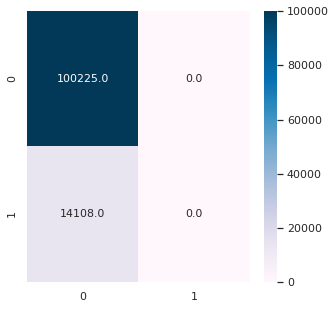

In [65]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test, prediction)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, annot_kws = {'size':11}, cmap = 'PuBu',fmt=".1f");